<a href="https://colab.research.google.com/github/AdiraMartin/Assignment-EDA/blob/main/HW_EDAII_Adira_Khansa_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.simplefilter(action = "ignore", category = FutureWarning)

In [ ]:
!gdown --id 1p0CVRayaiJN1KhVw1rv2nmM3aoxHRoxD

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1p0CVRayaiJN1KhVw1rv2nmM3aoxHRoxD
To: /content/telco_customer_churn.csv
100% 978k/978k [00:00<00:00, 122MB/s]


In [ ]:
# gather data
df = pd.read_csv('telco_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Data dictionary :**


*  `Customer ID` : Key Unique
*  `Gender` : Wether customer male or female
*  `SeniorCitizen` : Whether the customer is a senior citizen or not (1, 0)
*  `Partner` : Whether the customer has a partner or not (Yes, No)
*  `Dependents` : Whether the customer has dependents or not (Yes, No)
*  `tenure` : Number of months the customer has stayed with the company
*  `PhoneService`: Whether the customer has a phone service or not (Yes, No)
*  `MultipleLines`: Whether the customer has multiple lines or not (Yes, No, No phone service)
*  `InternetService` : Customer’s internet service provider (DSL, Fiber optic, No)
*  `OnlineSecurity` : Whether the customer has online security or not (Yes, No, No internet service)
*  `OnlineBackup` : Whether the customer has online backup or not (Yes, No, No internet service)
*  `DeviceProtection` : Whether the customer has device protection or not (Yes, No, No internet service)
*  `TechSupport` : Whether the customer has tech support or not (Yes, No, No internet service)
*  `StreamingTV` : Whether the customer has streaming TV or not (Yes, No, No internet service)
*  `StreamingMovies`: Whether the customer has streaming movies or not (Yes, No, No internet service)
*  `Contract` : The contract term of the customer (Month-to-month, One year, Two year)
*  `PaperlessBilling` : Whether the customer has paperless billing or not (Yes, No)
*  `PaymentMethod` : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*  `MonthlyCharges`: The amount charged to the customer monthly
*  `TotalCharges` : The total amount charged to the custome
*  `Churn` : Whether the customer churned or not (Yes or No)



In [ ]:
telco = df.copy()

## Cleaning Data

In [ ]:
# cleaning
telco = telco.loc[~telco['TotalCharges'].str.contains(' ')]
telco['TotalCharges'] = telco['TotalCharges'].astype(float)

<ipython-input-41-6d6b447fa43f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco['TotalCharges'] = telco['TotalCharges'].astype(float)


In [ ]:
## Many rows TotalCharges do not equal each tenue times monthly charges, so I try to recalculate it
telco.TotalCharges = telco.tenure * telco.MonthlyCharges

In [ ]:
telco[telco.tenure * telco.MonthlyCharges != telco.TotalCharges].shape

(0, 21)

In [ ]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,2035.20,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7430.40,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,325.60,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,297.60,Yes


In [ ]:
# Check missing value
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Check duplicate rows
telco.duplicated().sum()

0

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Statistical Summary

In [ ]:
# split column names based on respective types

num = telco.select_dtypes(include = ['int64', 'float64']).columns.tolist()
cats = telco.select_dtypes(exclude = ['int64', 'float64']).columns.tolist()

print(num)
print(cats)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
# stats summary
# numerical
telco[num].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.147248
std,0.368844,24.545260,30.085974,2264.703327
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,397.800000
50%,0.000000,29.000000,70.350000,1394.575000
75%,0.000000,55.000000,89.862500,3791.250000
max,1.000000,72.000000,118.750000,8550.000000


Observations :

*   I think overall minimum and maximum values are makes sense, nothing suspicious
*   `SeniorCitizen` column is boolean/binary column
*   `tenure`, `MonthlyCharges` and `TotalCharges` appears to have not symmetrical distribution






In [ ]:
# categorical
telco[cats].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Observations:

*   `customerID` is a Primary Key, so it will not be used for future analysis
*   Most of the columns are binary (Yes, No) + (No ... Services) for customer who have no internet or phone service
*   Majority cutomer choose fiber optic for their InternetServices
*   Most of customer choose a Month to Month contract and used electronic check for paymentmethod, so additionally, paperless billing is also frequently used.
*   The majority of customers continue their subscription, as evidenced by the frequent occurrence of NO in the `churn` column.



In [ ]:
for col in cats:
  print(f'Value counts for column {col} :')
  print(telco[col].value_counts())
  print("---"*10)
  print("\n")

Value counts for column customerID :
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64
------------------------------


Value counts for column gender :
Male      3549
Female    3483
Name: gender, dtype: int64
------------------------------


Value counts for column Partner :
No     3639
Yes    3393
Name: Partner, dtype: int64
------------------------------


Value counts for column Dependents :
No     4933
Yes    2099
Name: Dependents, dtype: int64
------------------------------


Value counts for column PhoneService :
Yes    6352
No      680
Name: PhoneService, dtype: int64
------------------------------


Value counts for column MultipleLines :
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
------------------------------


Value counts for column Interne

## Univariate Analysis



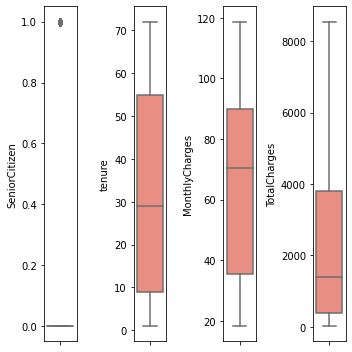

In [ ]:
plt.figure(figsize=(5,5))

features = num
for i in range (0,len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=telco[features[i]], color ='salmon')
  plt.tight_layout()

Observation:
*   The `SeniorCitizen` column is a binary column, so there is no need to identify outliers at this stage.
*   On the other hand, there is no outlier in each columns, which is reasonable and goed!



<ipython-input-18-51eeaf1238b2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=telco[feature[i]], color = 'skyblue')
<ipython-input-18-51eeaf1238b2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=telco[feature[i]], color = 'skyblue')
<ipython-input-18-51eeaf1238b2>:6: UserWarning: 

`dis

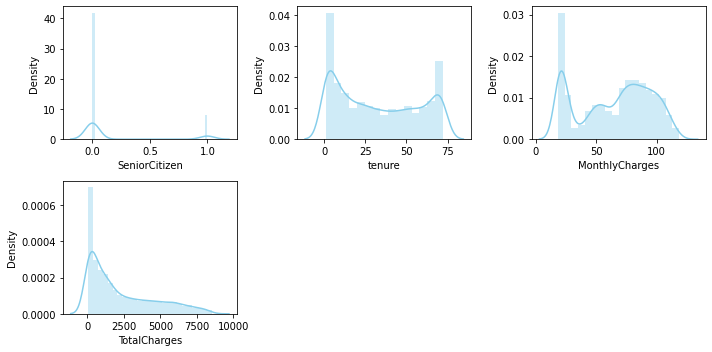

In [ ]:
plt.figure(figsize = (10, 5))

feature = num
for i in range(0, len(feature)):
  plt.subplot(2, len(feature) //2 + 1, i+1)
  sns.distplot(x=telco[feature[i]], color = 'skyblue')
  plt.xlabel(feature[i])
  plt.tight_layout()


Obserations:

*   There is no symetrical distribution in all numerik columns

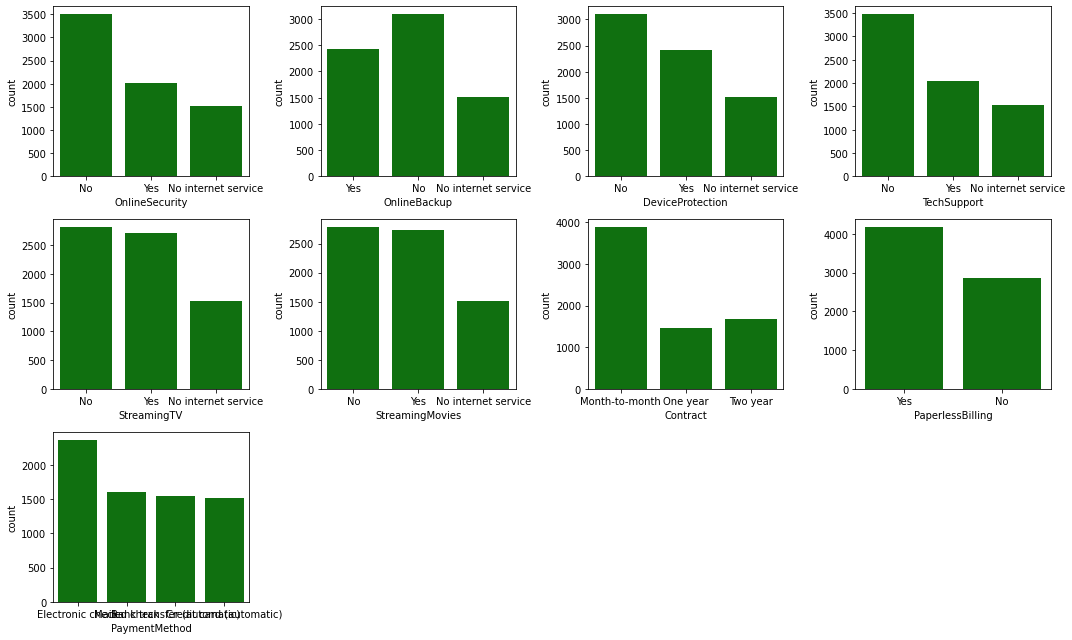

In [ ]:
plt.figure(figsize=(15,9))

features = ['OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract', 'PaperlessBilling','PaymentMethod']
for i in np.arange(1, len(features)+1):
    plt.subplot(3, len(features)//3+1, i)
    sns.countplot(x=telco[features[i-1]], color='green')
    plt.xlabel(features[i-1])
    plt.tight_layout()

## Multivariate Analysis


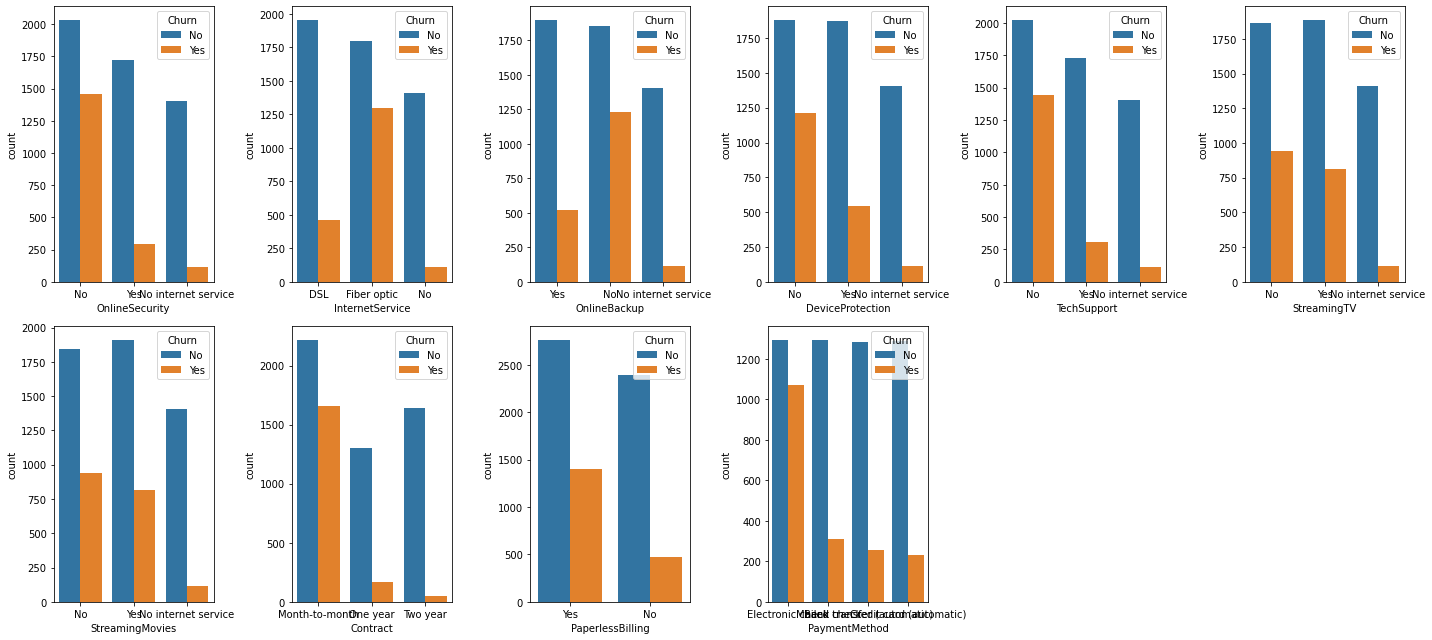

In [ ]:
selected_categoricals = ['OnlineSecurity', 'InternetService', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract', 'PaperlessBilling','PaymentMethod']

plt.figure(figsize=(20,9))

features = selected_categoricals
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    sns.countplot(x=telco[features[i-1]], hue=telco['Churn'])
    plt.xlabel(features[i-1])
    plt.tight_layout()

Obserations:
*   Customer commitment greatly influences customer churn. It has been proven that customers who pay their bills for 2 years contract have a very low 'yes' churn rate.

*  On the other hand, I don't see any spesific insight, I guess I need more knowledge or maybe jam terbang

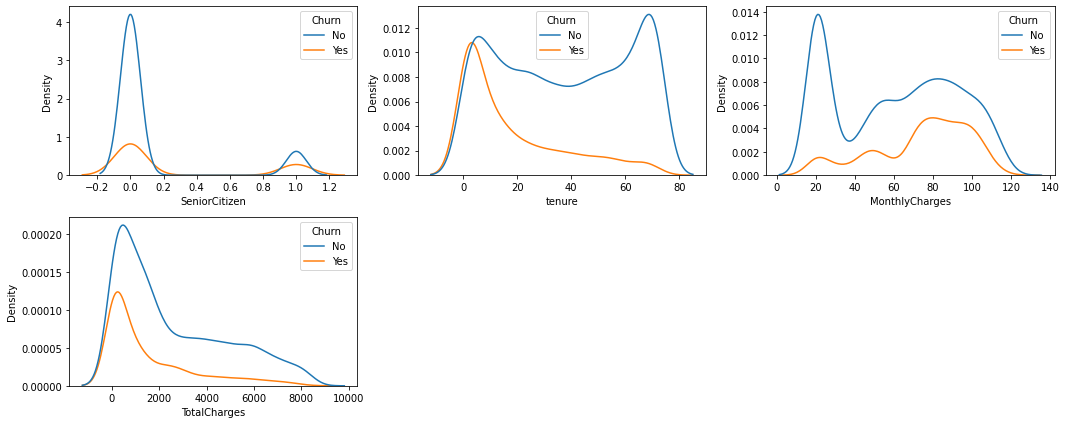

In [ ]:
plt.figure(figsize=(15,6))

features = num
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    sns.kdeplot(x=telco[features[i-1]], hue=telco['Churn'])
    plt.xlabel(features[i-1])
    plt.tight_layout()

Obserations:
*   In the 'totalcharges' column, both lines have a peak at the same point.
*   The 'NO' line in the 'tenure' column has two peaks, while the 'YES' line has one peak at the beginning.
*   The 'mothlycharges' column has one high peak on the 'NO' line, while the highest peak on the 'YES' line is at the end.

<Axes: >

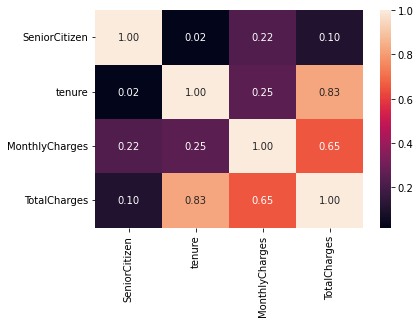

In [ ]:
correlation = telco.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [ ]:
sns.pairplot(telco, hue='Churn')

I guess there is no spesific insight in this pairplot

## Deep Dive

In [ ]:
telco.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1453,5899-OUVKV,Male,0,No,No,31,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.50,2929.50,No
4096,0829-XXPLX,Female,0,No,No,20,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.40,1788.00,No
1316,9788-YTFGE,Male,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.95,139.65,No
6183,6981-TDRFT,Male,0,Yes,Yes,44,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,54.30,2389.20,No
1747,3198-VELRD,Female,0,Yes,Yes,3,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),84.75,254.25,Yes


In [ ]:
# 1. Top 3 Customer with higest bill in each internet service
top_3_highest_spend = (telco
                      .groupby(['customerID','InternetService'])
                      .agg(TotalSpend = ('TotalCharges', 'sum'))
                      .reset_index()
                      .sort_values('TotalSpend', ascending=False)
                      .groupby('InternetService')
                      .head(3)
                      .reset_index(drop=True)
                      )

top_3_highest_spend

,customerID,InternetService,TotalSpend
0,7569-NMZYQ,Fiber optic,8550.0
1,9924-JPRMC,Fiber optic,8510.4
2,2889-FPWRM,Fiber optic,8481.6
3,8197-BFWVU,DSL,6714.0
4,0244-LGNFY,DSL,6670.8
5,8580-QVLOC,DSL,6656.4
6,7096-ZNBZI,No,1904.4
7,4625-XMOYM,No,1890.0
8,9838-BFCQT,No,1879.2


In [ ]:
# 2. Factors that have the strongest correlation with customer churn
telco_OHE = pd.get_dummies(telco, columns=cats)
corr_matrix = telco_OHE.corr()
corr_churn = corr_matrix['Churn_Yes'].sort_values(ascending=False)

print(corr_churn)

Churn_Yes                              1.000000
Contract_Month-to-month                0.404565
OnlineSecurity_No                      0.342235
TechSupport_No                         0.336877
InternetService_Fiber optic            0.307463
                                         ...   
OnlineSecurity_No internet service    -0.227578
StreamingMovies_No internet service   -0.227578
Contract_Two year                     -0.301552
tenure                                -0.354049
Churn_No                              -1.000000
Name: Churn_Yes, Length: 7079, dtype: float64


In these table, the strongest positive correlation with customer churn is observed for the Contract_Month-to-month column, but the correlation itself is not very strong.


In [ ]:
# 3. Familiy related (Dependents and parner) - customer churn

Family_Related = (telco
                      .groupby(['gender','Partner','Dependents'])
                      .agg(Churn_counts = ('Churn', 'value_counts'))
                      .sort_values('Churn_counts', ascending=False)
                      .reset_index()
                      )

Family_Related

,gender,Partner,Dependents,Churn,Churn_counts
0,Male,No,No,No,1089
1,Female,No,No,No,1068
2,Female,Yes,Yes,No,746
3,Male,Yes,Yes,No,745
4,Female,Yes,No,No,618
5,Male,Yes,No,No,615
6,Female,No,No,Yes,587
7,Male,No,No,Yes,536
8,Male,Yes,No,Yes,233
9,Female,Yes,No,Yes,187


As expected, customers who do not have a partner and dependents have a very high 'non-churn' rate, but it is possible that customers who have partners and dependents are the second highest to stay as customers. Other than that, Gender is not a differentiating factor as the churn counts are almost the same.

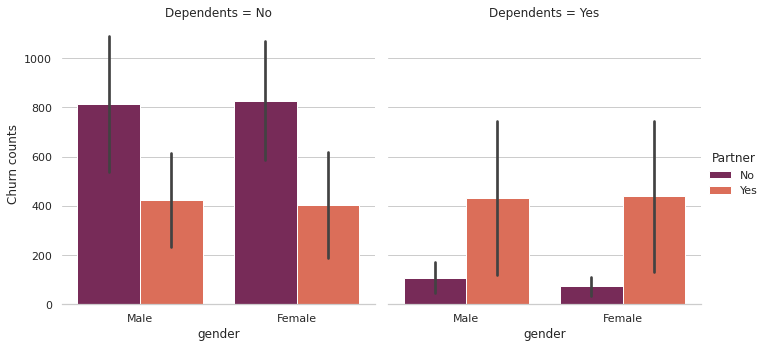

In [ ]:
## visualization
sns.set(style="whitegrid")

g = sns.catplot(x="gender", y="Churn_counts", hue="Partner", col="Dependents",
                data=Family_Related, kind="bar", palette="rocket")

g.despine(left=True)
g.set_ylabels("Churn counts")
plt.show()

I have no idea how to improve this visualization, so I ended up 'copas' this code from ChatGPT hehe

In [ ]:
# 4. Churn rate differ based on OnlineSecurity, DeviceProtection and TechSupport
service_churn_rate = (telco
                      .groupby(['OnlineSecurity', 'DeviceProtection', 'TechSupport'])
                      .agg(
                          total_customers=('customerID', 'count'),
                          churned_customers=('Churn_encode', 'sum'),
                          churn_rate=('Churn_encode', 'mean'))
                      .sort_values('churn_rate', ascending=False)
                      .reset_index()
                      )

service_churn_rate

,OnlineSecurity,DeviceProtection,TechSupport,total_customers,churned_customers,churn_rate
0,No,No,No,1738,914,0.525892
1,No,Yes,No,815,336,0.412270
2,Yes,No,No,522,134,0.256705
3,No,No,Yes,449,115,0.256125
4,No,Yes,Yes,495,96,0.193939
5,Yes,Yes,No,397,62,0.156171
6,Yes,No,Yes,385,48,0.124675
7,No internet service,No internet service,No internet service,1520,113,0.074342
8,Yes,Yes,Yes,711,51,0.071730


From the table, we can see that customers who do not have OnlineSecurity, DeviceProtection, or TechSupport services have the highest churn rate, with a rate of 52.6%. Customers who have all three services have the lowest churn rate, with a rate of only 7.2%. Maybe we can suggest to offer some bundled packages of services or upselling customers on these services to improve retention rates.

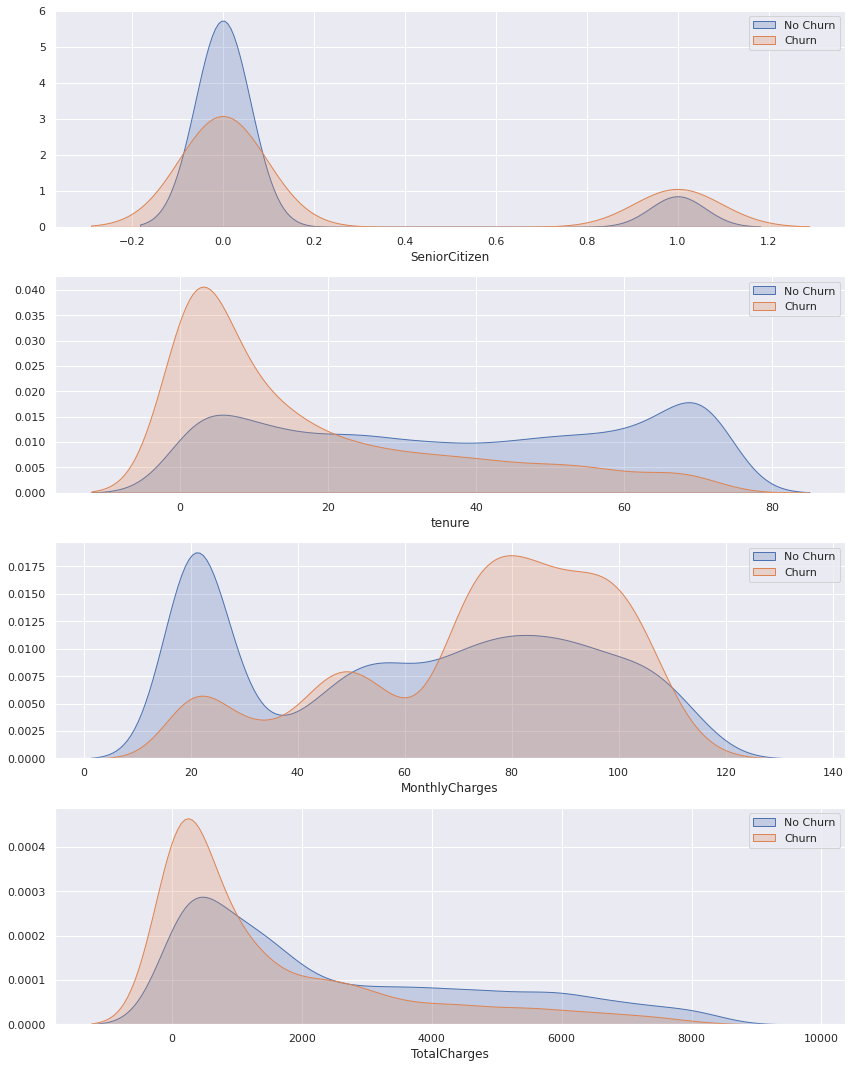

In [ ]:
# 5. Churn according numerical distribution

telco['Churn_encode'] = telco['Churn'].map({'No': 0, 'Yes': 1})
plt.figure(figsize=(12,15))

for i,col in enumerate(num):
    plt.subplot(4,1,i + 1)
    sns.kdeplot(telco.loc[(telco['Churn_encode'] == 0), col], label = 'No Churn', shade = True)
    sns.kdeplot(telco.loc[(telco['Churn_encode'] == 1), col], label = 'Churn', shade = True)
    plt.legend()
    plt.ylabel('')
    plt.tight_layout()

plt.show()

Pengakuan dosa : I was stuck doing this EDA and had no idea what to do, so I ended up googling and came across someone else's analysis of the same data. I found it insightful, especially the great visualization. Although it's similar to the multivariate line plot analysis above, it has some slight visual differences (or maybe i need to improve the way i read it)

anyway, the observation are:
*   Mostly customer who are a senior citizen have a highly churn rate. On the other hand, customer who are not a senior citizen have a long commitment
*   customers who have a low number of tenure (haven't stayed with the company in for very long time) are more likely to leave, especially in the first few months
*  Customers who are paying higher monthly charges (around 60 or more) are also more likely to leave
*  The distributions for total charges are similar for both churn and non-churn customers, but non-churn customers tend to have lower total charges
